<b> One way we decided to measure better is using the median age at death by neighborhood. Because `less people = no overpopulation` , the lower the median age at death the better the neighborhood.

First, lets open the data and and display it in a nice table. 

In [1]:
import pandas as pd
import importlib
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


ds = pd.read_csv("Median Age At Death.csv", usecols = ['NEIGHBORHOOD','TOTAL MD AGE AT DEATH'])
ds.head(95)

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
1,CHATEAU,NaN
2,NORTH SHORE,80.0
3,ALLEGHENY WEST,65.0
4,SAINT CLAIR,67.5
5,WEST END,77.5
6,ESPLEN,71.7
7,ARLINGTON HEIGHTS,63.7
8,STRIP DISTRICT,72.5
9,FAIRYWOOD,53.3


<b>Next, lets find the lowest median age at death.<b>

In [12]:
ds['TOTAL MD AGE AT DEATH']. min()

0.0

<b> Obviosuly we cannot use 0 as the lowest Median age at death, therefore we must find the second lowest median age at death. <b>

In [13]:
ds.nsmallest(2, ['TOTAL MD AGE AT DEATH'])


,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
9,FAIRYWOOD,53.3


### There we have it, the best neighboorhood to live in based on this metric is Fairywood, Pittsburgh

Now that we have detrimened this, lets have some fun with the data.
First, let's convert the nice table above into an even nicer bar graph

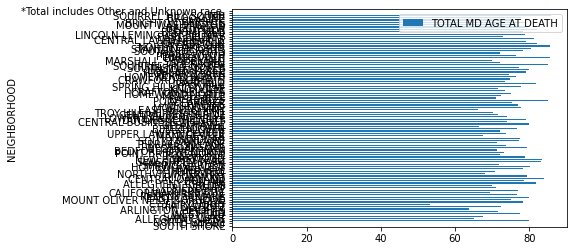

In [24]:
ds.plot.barh(x='NEIGHBORHOOD',
            y='TOTAL MD AGE AT DEATH')

Thats kind of ugly, the problem is we have too many neighborhoods in our list. Lets condense this list so it only displays he lowest 15 median ages at death.

In [19]:
ds.sort_values('TOTAL MD AGE AT DEATH')

ns=ds.head(15)
ns

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0
1,CHATEAU,NaN
2,NORTH SHORE,80.0
3,ALLEGHENY WEST,65.0
4,SAINT CLAIR,67.5
5,WEST END,77.5
6,ESPLEN,71.7
7,ARLINGTON HEIGHTS,63.7
8,STRIP DISTRICT,72.5
9,FAIRYWOOD,53.3


Now, let's make a new bar graph that *actually* looks good

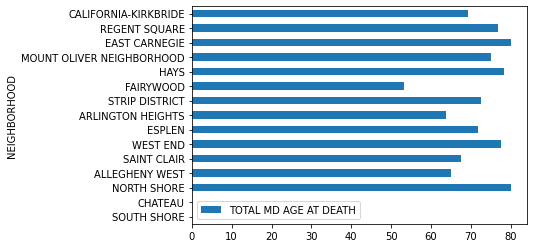

In [23]:
ns.plot.barh(x='NEIGHBORHOOD',
            y='TOTAL MD AGE AT DEATH')

Much better. I'm running out of ways to do to manipulate this data, so lets find the average of this new dataset because why not. First we need to drop the top two neighborhoods in the dataset because they are 0 and NaN respectivly, which will inevitably mess up the calculation

In [43]:
ps=ns.drop([0,1])
ps

,NEIGHBORHOOD,TOTAL MD AGE AT DEATH
2,NORTH SHORE,80.0
3,ALLEGHENY WEST,65.0
4,SAINT CLAIR,67.5
5,WEST END,77.5
6,ESPLEN,71.7
7,ARLINGTON HEIGHTS,63.7
8,STRIP DISTRICT,72.5
9,FAIRYWOOD,53.3
10,HAYS,78.3
11,MOUNT OLIVER NEIGHBORHOOD,75.0


In [44]:
ps[['TOTAL MD AGE AT DEATH']].mean(axis=0)

TOTAL MD AGE AT DEATH    71.576923
dtype: float64

Once again, there we have it. **The best neighboorhood is still Fairywood, Pittsburgh** and **the average of the lowest 15** *(technically 13)* **neighboorhoods is 71.58 years old**